In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [9]:
from LCA_urine_model import LCA_urine_model
from logistics_model import logistics_model

In [10]:
n_regen = 20
n_collection = 1

In [ ]:
Logistics = logistics_model('..\shapefiles\\building_block_people_WGS_2.csv', n_regen, n_collection)
distance_regeneration, distance_collection = Logistics.logistics_distances()

In [ ]:
Total_Energy = []
Total_GHG = []
for index, row in distance_regeneration.iterrows()
    number_of_houses_per_facility= row['num_people']
    distance_regen = row['total_dist_m']/1000
    ENERGY, GHG = LCA_urine_model(number_of_houses_per_facility, distance_regen, distance_collection)
    Total_Energy.append(ENERGY)
    Total_GHG.append(GHG)

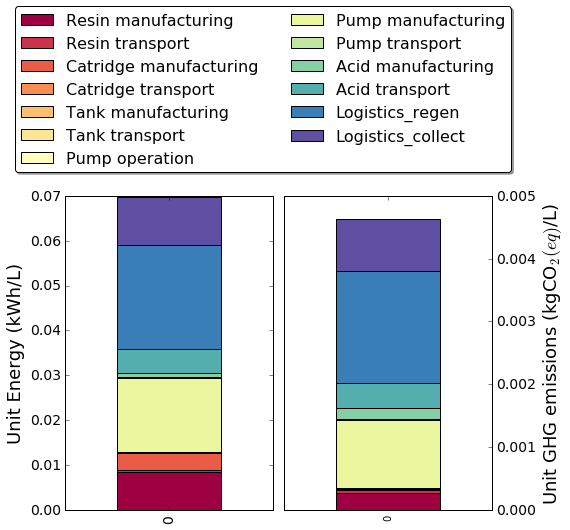

In [5]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1,2, 1)
a=Total_ENERGY_plot.plot(kind='bar', stacked = True, ax=ax, legend=False,colormap='Spectral')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Unit Energy (kWh/L)',fontsize=18)
ax = fig.add_subplot(1,2, 2)
b=Total_GHG_plot.plot(kind='bar', stacked = True, secondary_y=True, ax=ax, legend=False,colormap='Spectral')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Unit GHG emissions (kgCO$_2(eq)$/L)',fontsize=18)
b.legend(loc='lower center', bbox_to_anchor=(-0.1, 1.05),ncol=2, fancybox=True, shadow=True,fontsize=16)
fig.tight_layout()